In [2]:
import pandas as pd

df = pd.read_csv('used_car_data.csv')
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [52]:
car_brands = df['Name'].str.split(n=1, expand=True)
car_brands

#Merk dan jumlah mobil yang tersedia
car_brands[0].value_counts().sort_values()

Ambassador          1
Smart               1
Bentley             1
Isuzu               1
Lamborghini         1
ISUZU               2
Force               3
Datsun             13
Jeep               15
Porsche            18
Volvo              21
Mini               26
Mitsubishi         27
Fiat               28
Jaguar             40
Land               60
Nissan             91
Chevrolet         121
Renault           145
Skoda             173
Tata              186
Audi              236
BMW               267
Mahindra          272
Ford              300
Volkswagen        315
Mercedes-Benz     318
Toyota            411
Honda             608
Hyundai          1107
Maruti           1211
Name: 0, dtype: int64

In [48]:
#Kota dengan jumlah mobil terbanyak
df['Location'].value_counts().head(1)

Mumbai    790
Name: Location, dtype: int64

In [5]:
#distribusi tahun
df['Year'].describe()

count    6019.000000
mean     2013.358199
std         3.269742
min      1998.000000
25%      2011.000000
50%      2014.000000
75%      2016.000000
max      2019.000000
Name: Year, dtype: float64

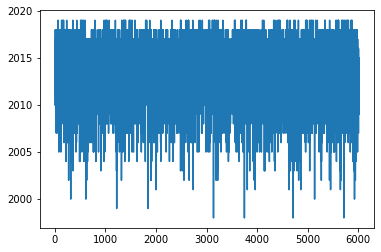

In [6]:
import matplotlib.pyplot as plt
df['Year'].plot()

In [7]:
under_100k = df['Kilometers_Driven'] < 100000
under_100k.count()

6019

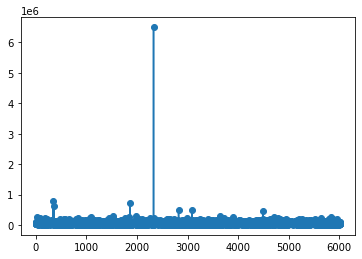

In [8]:
import matplotlib.pyplot as plt
df['Kilometers_Driven'].plot(marker='o')

In [9]:
df['Mileage'] = df['Mileage'].str.replace('kmpl','')
df['Mileage'] = df['Mileage'].str.replace('km/kg','')
df['Mileage2'] = df['Mileage'].apply(pd.to_numeric, errors = 'coerce')
df['Mileage2'].isnull().value_counts() #cek ada yang null ga

False    6017
True        2
Name: Mileage2, dtype: int64

In [10]:
median_mil2 = df['Mileage2'].median()
df['Mileage2'].fillna(median_mil2).isnull().value_counts() #yang null diisi dgn nilai median dr seluruh data, cek lg

False    6019
Name: Mileage2, dtype: int64

In [11]:
df.groupby('Fuel_Type').mean()['Mileage2'].fillna(median_mil2)

Fuel_Type
CNG         25.418036
Diesel      18.620484
Electric    18.150000
LPG         19.385000
Petrol      17.415204
Name: Mileage2, dtype: float64

In [21]:
feature = df.groupby('Price').count()['Kilometers_Driven']
max(feature)

88